### DECISION TREES
(https://youtu.be/_L39rN6gz7Y?si=feTAa_w4oTar54IG)

#### CLASSIFICATION TREES

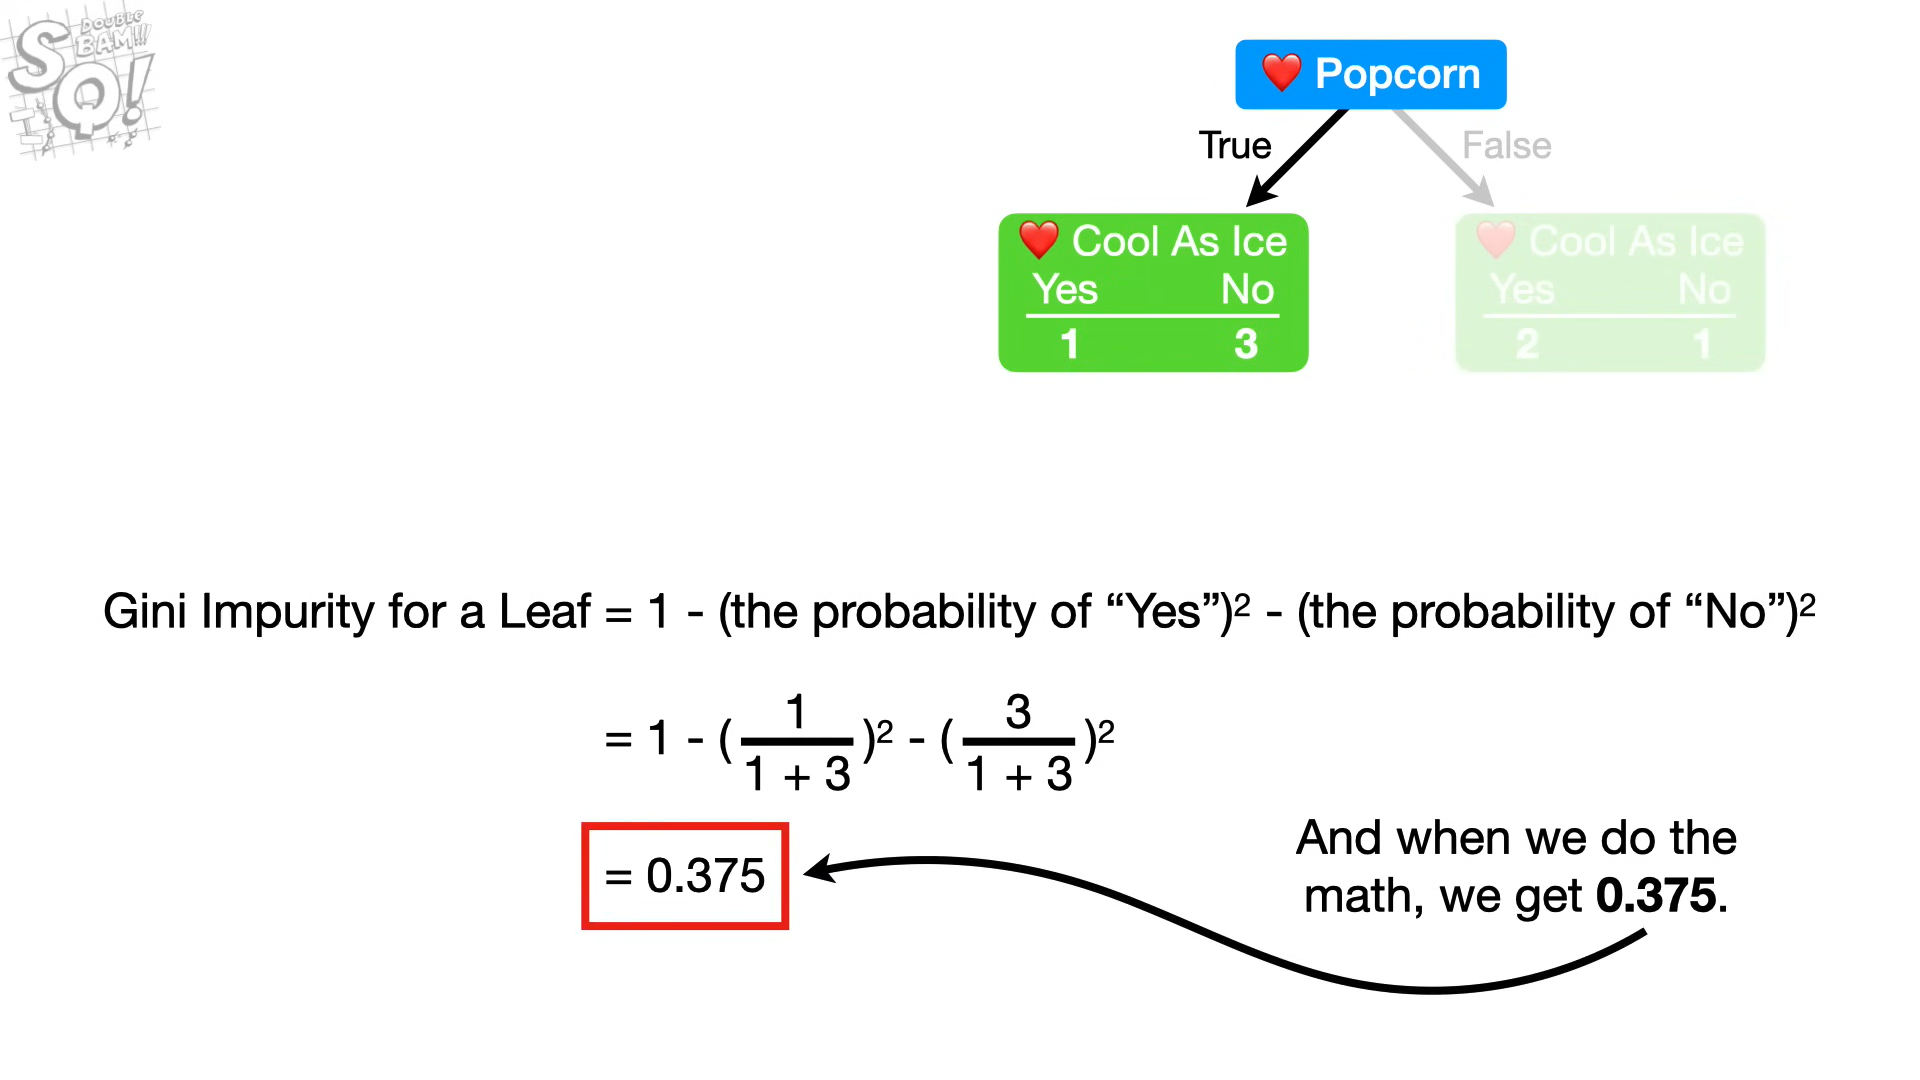
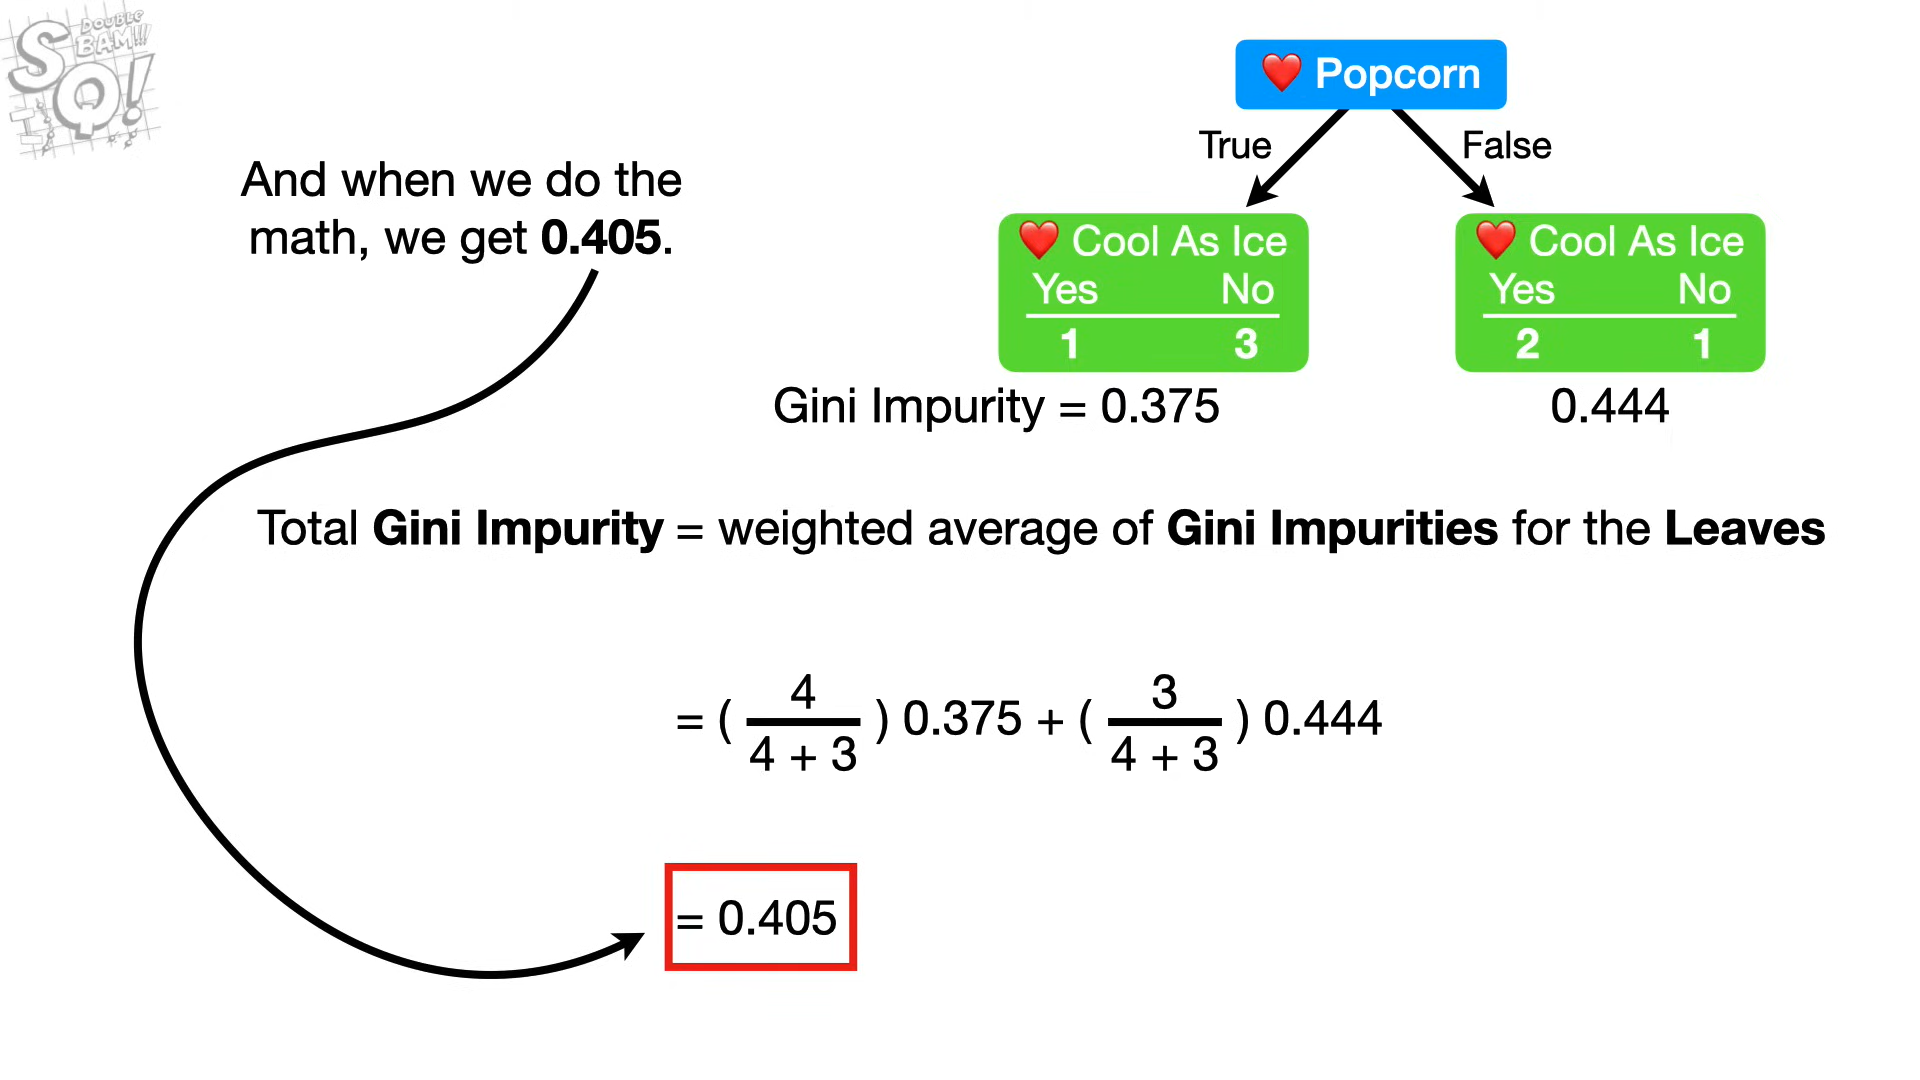

#### REGRESSION TREES

https://youtu.be/g9c66TUylZ4?si=LtADvDeOvR33c2Oo

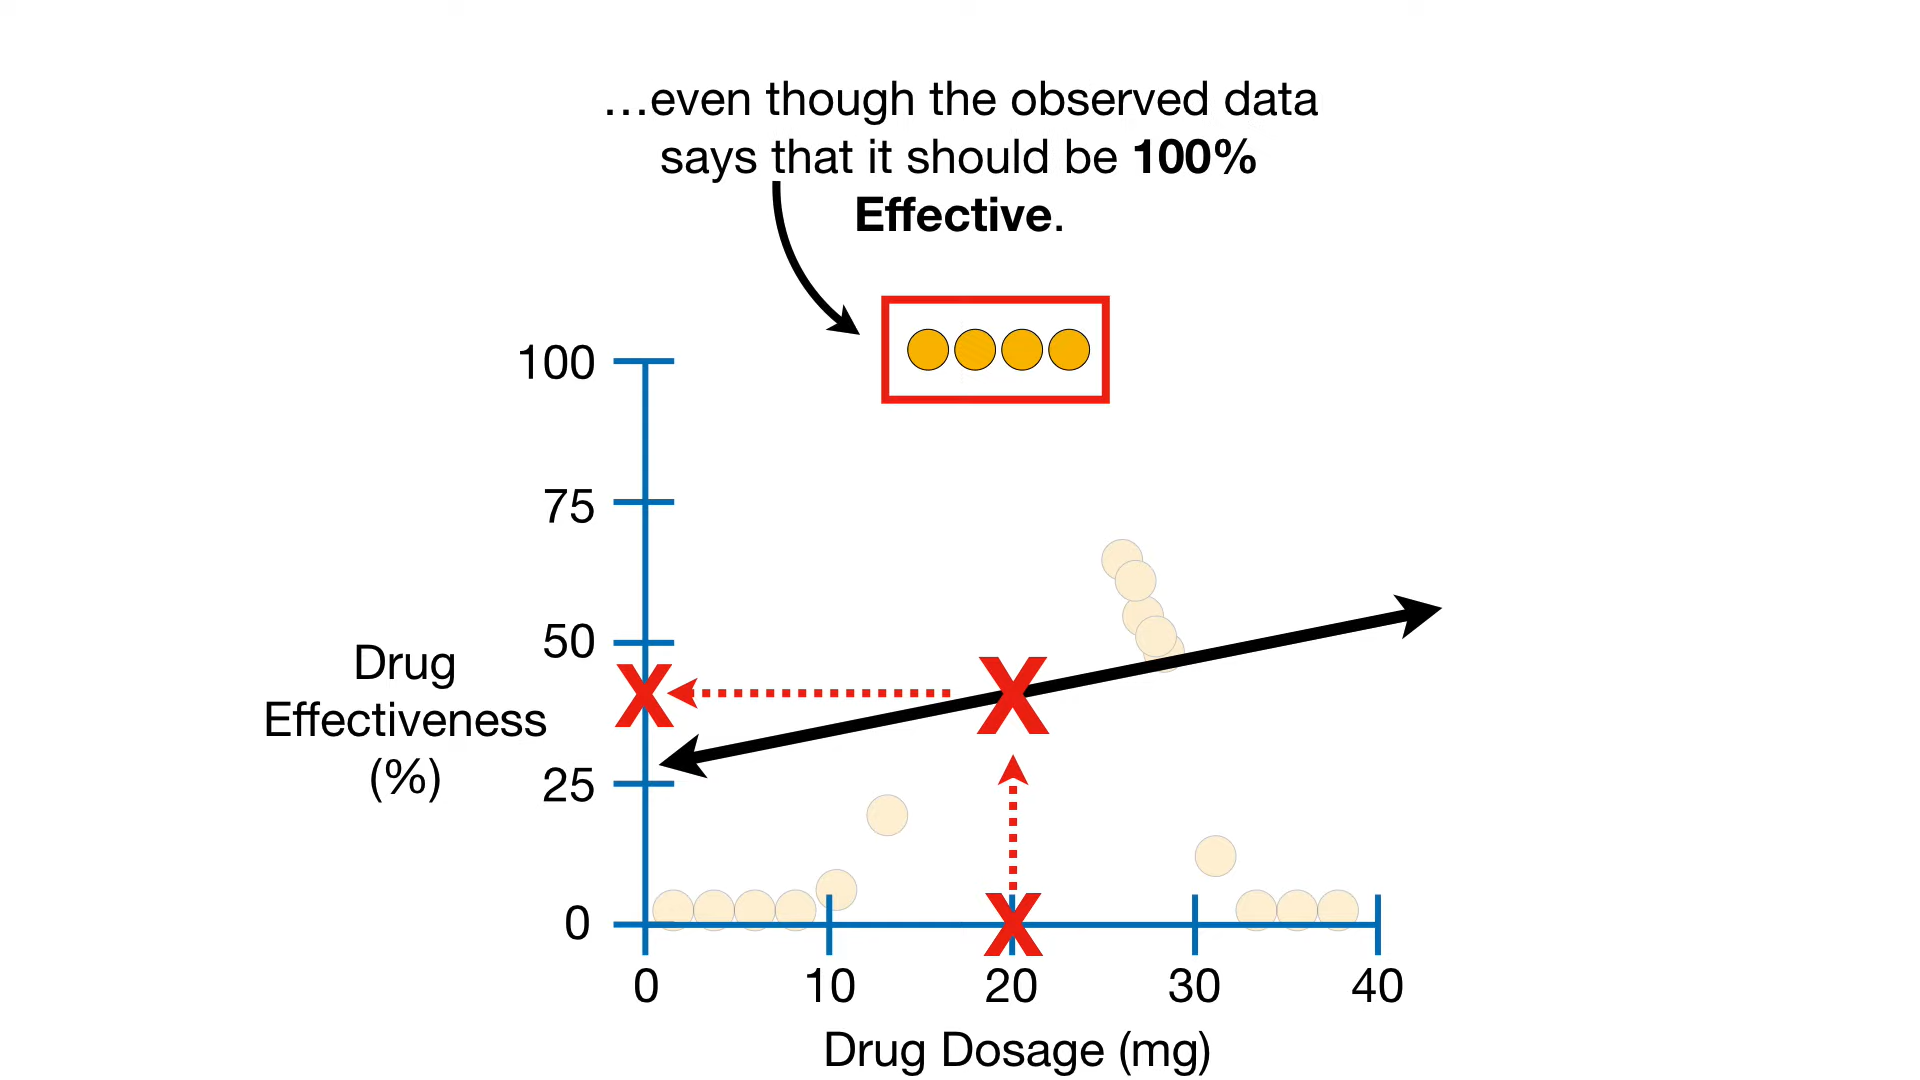
sometimes regression lines can be correct. as the lines are straight but the data is not linear

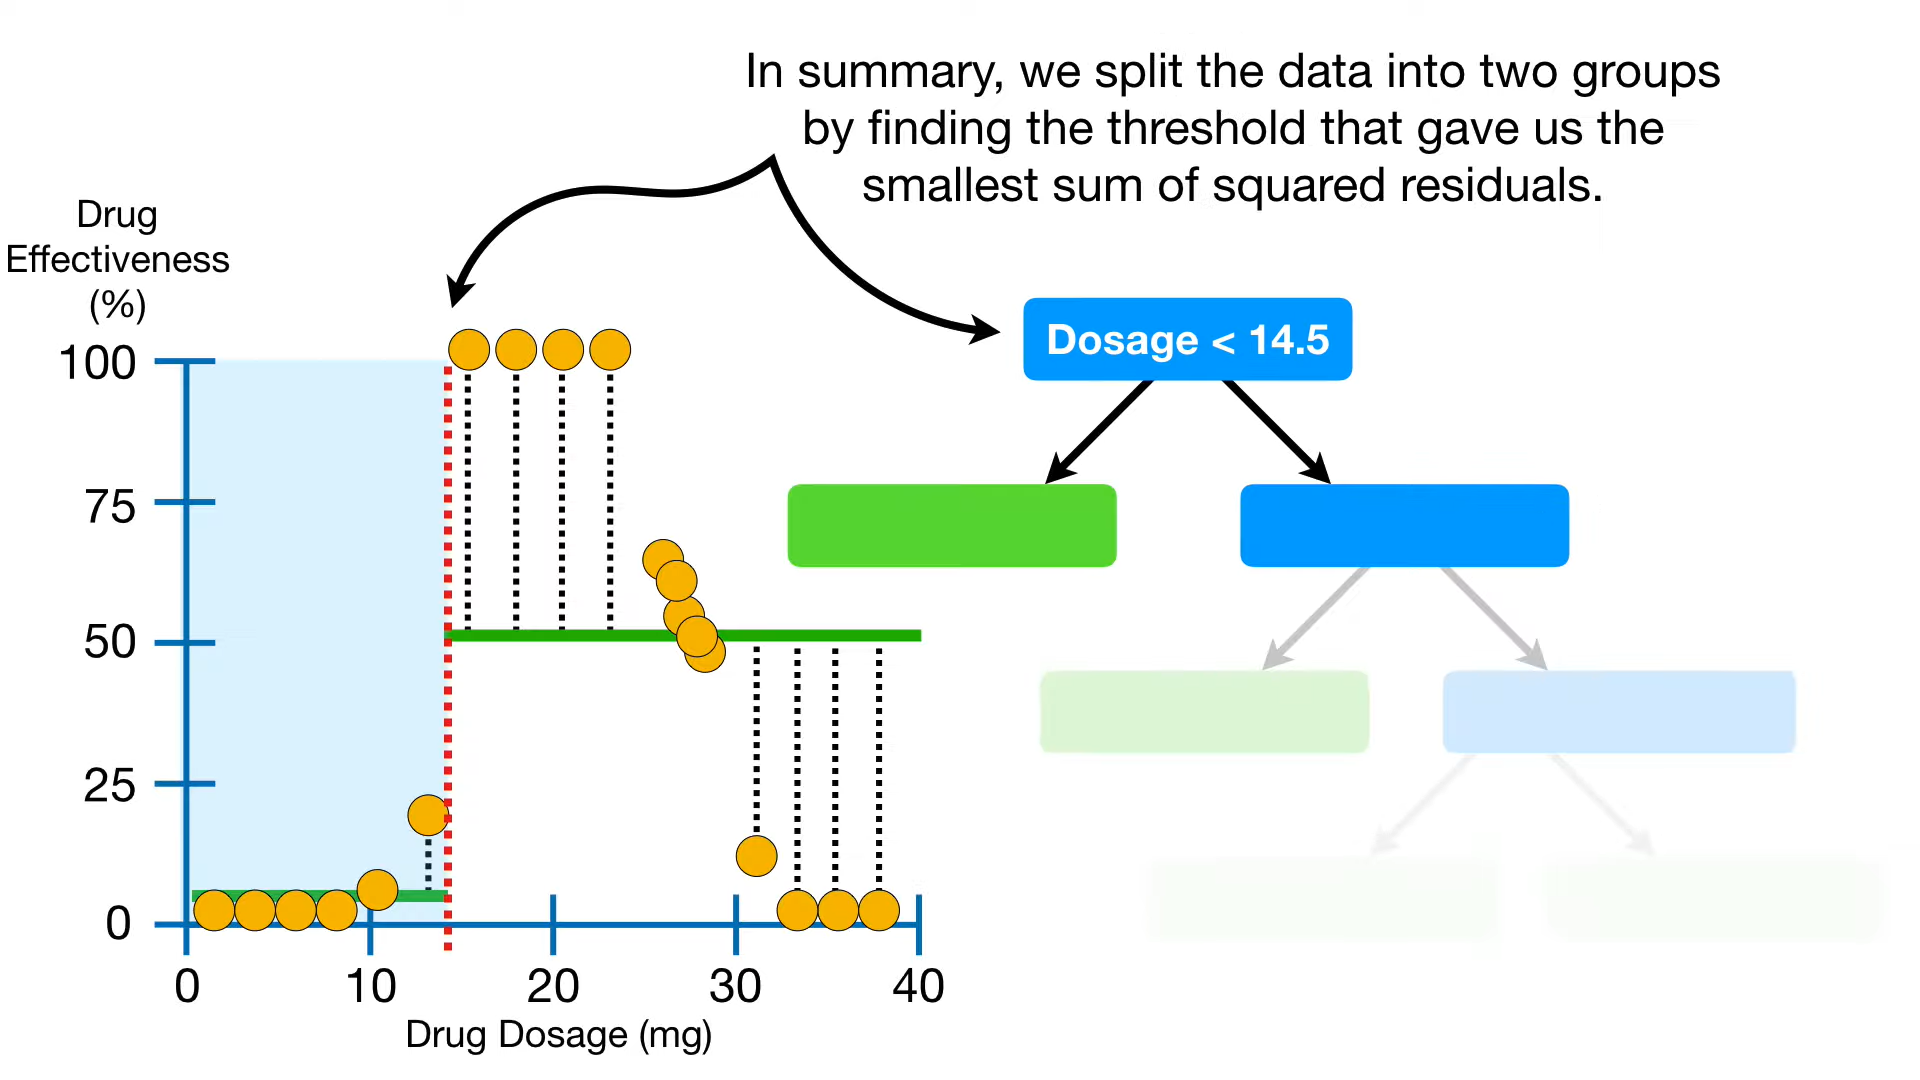

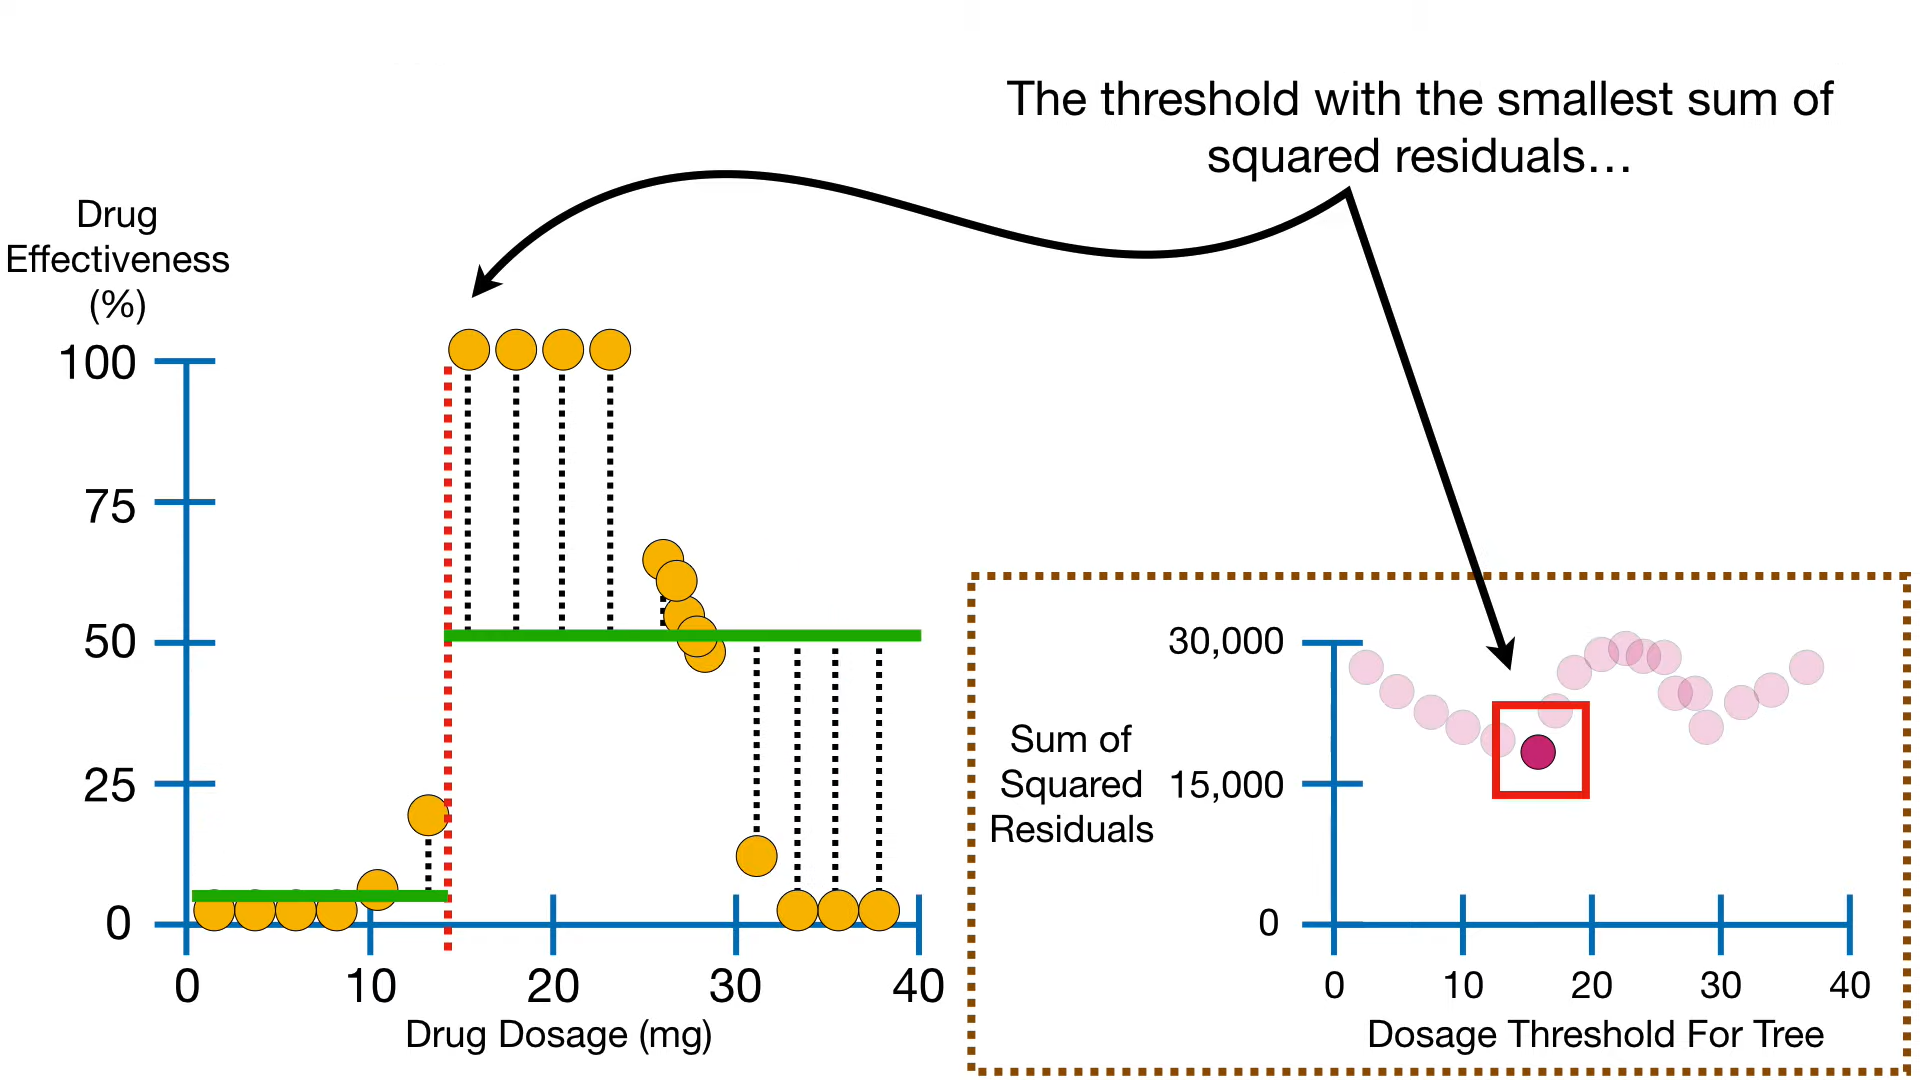
At each point the sum of squared residuals is calculated and the least one is selected as root of the tree

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [6]:
data = load_breast_cancer()
x,y = data.data,data.target

x[0],y[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 np.int64(0))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[39  4]
 [ 3 68]]


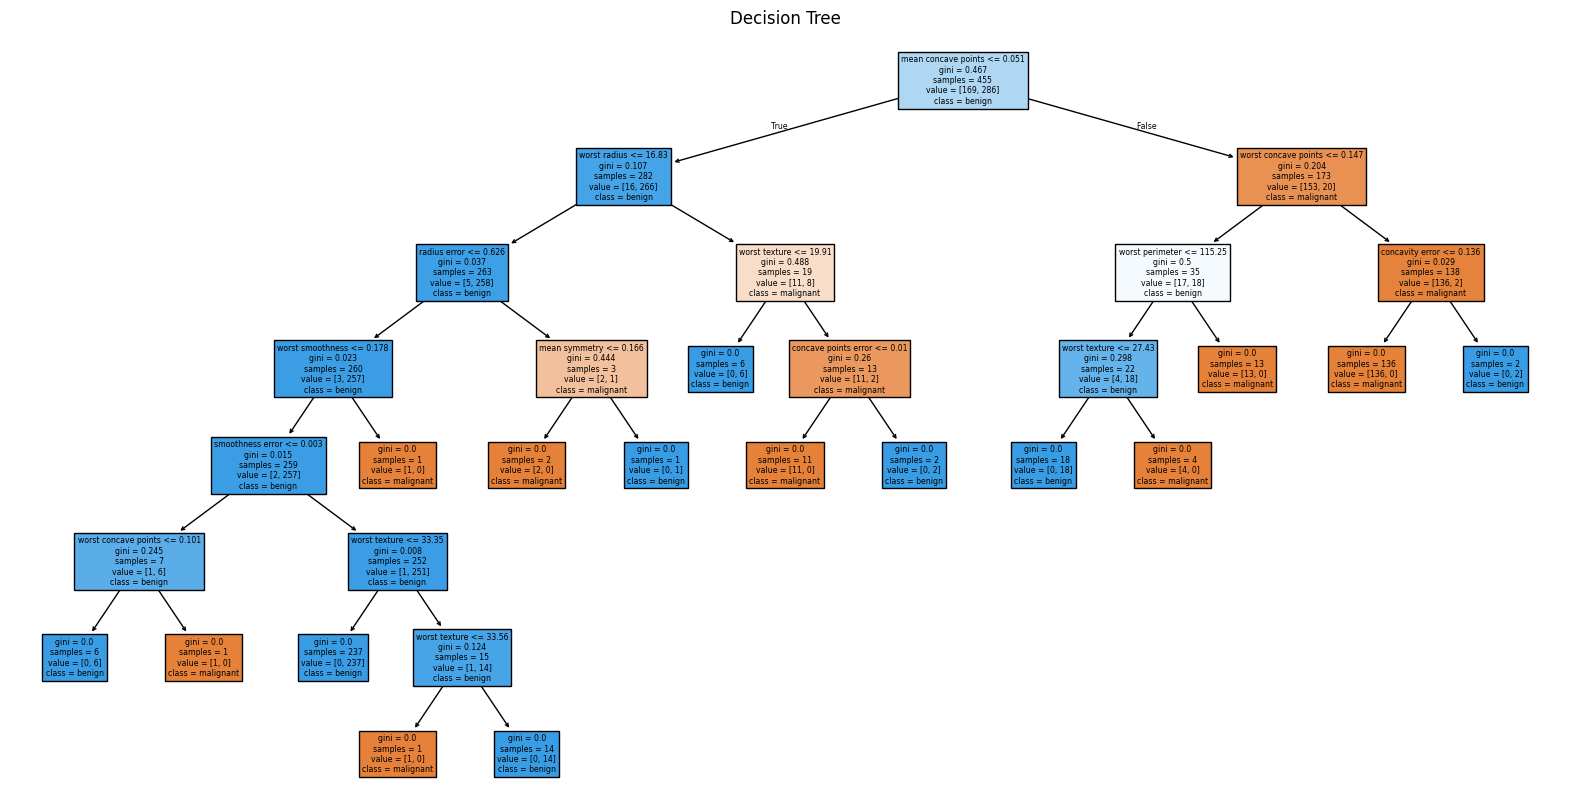

In [11]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=data.feature_names, class_names = data.target_names, filled=True)
plt.title("Decision Tree")
plt.show()

In [13]:
importances = model.feature_importances_
for feature, importance in zip(data.feature_names, importances):
    if importance > 0:
        print(f"{feature}: {importance:.4f}")

mean concave points: 0.6914
mean symmetry: 0.0063
radius error: 0.0120
smoothness error: 0.0012
concavity error: 0.0186
concave points error: 0.0159
worst radius: 0.0523
worst texture: 0.0679
worst perimeter: 0.0515
worst smoothness: 0.0092
worst concave points: 0.0737


### RANDOM FORESTS

https://youtu.be/J4Wdy0Wc_xQ?si=lU-3hp57P4ufc2a8

We create a Bootstrapped Dataset that can have duplicate samples by randomly taking samples from the original dataset.

Bootstapping and using aggregate to take decisions is called bagging. 
The data samples that didnt make into the bootstapped dataset is called Out of Bag (OOB) samples.

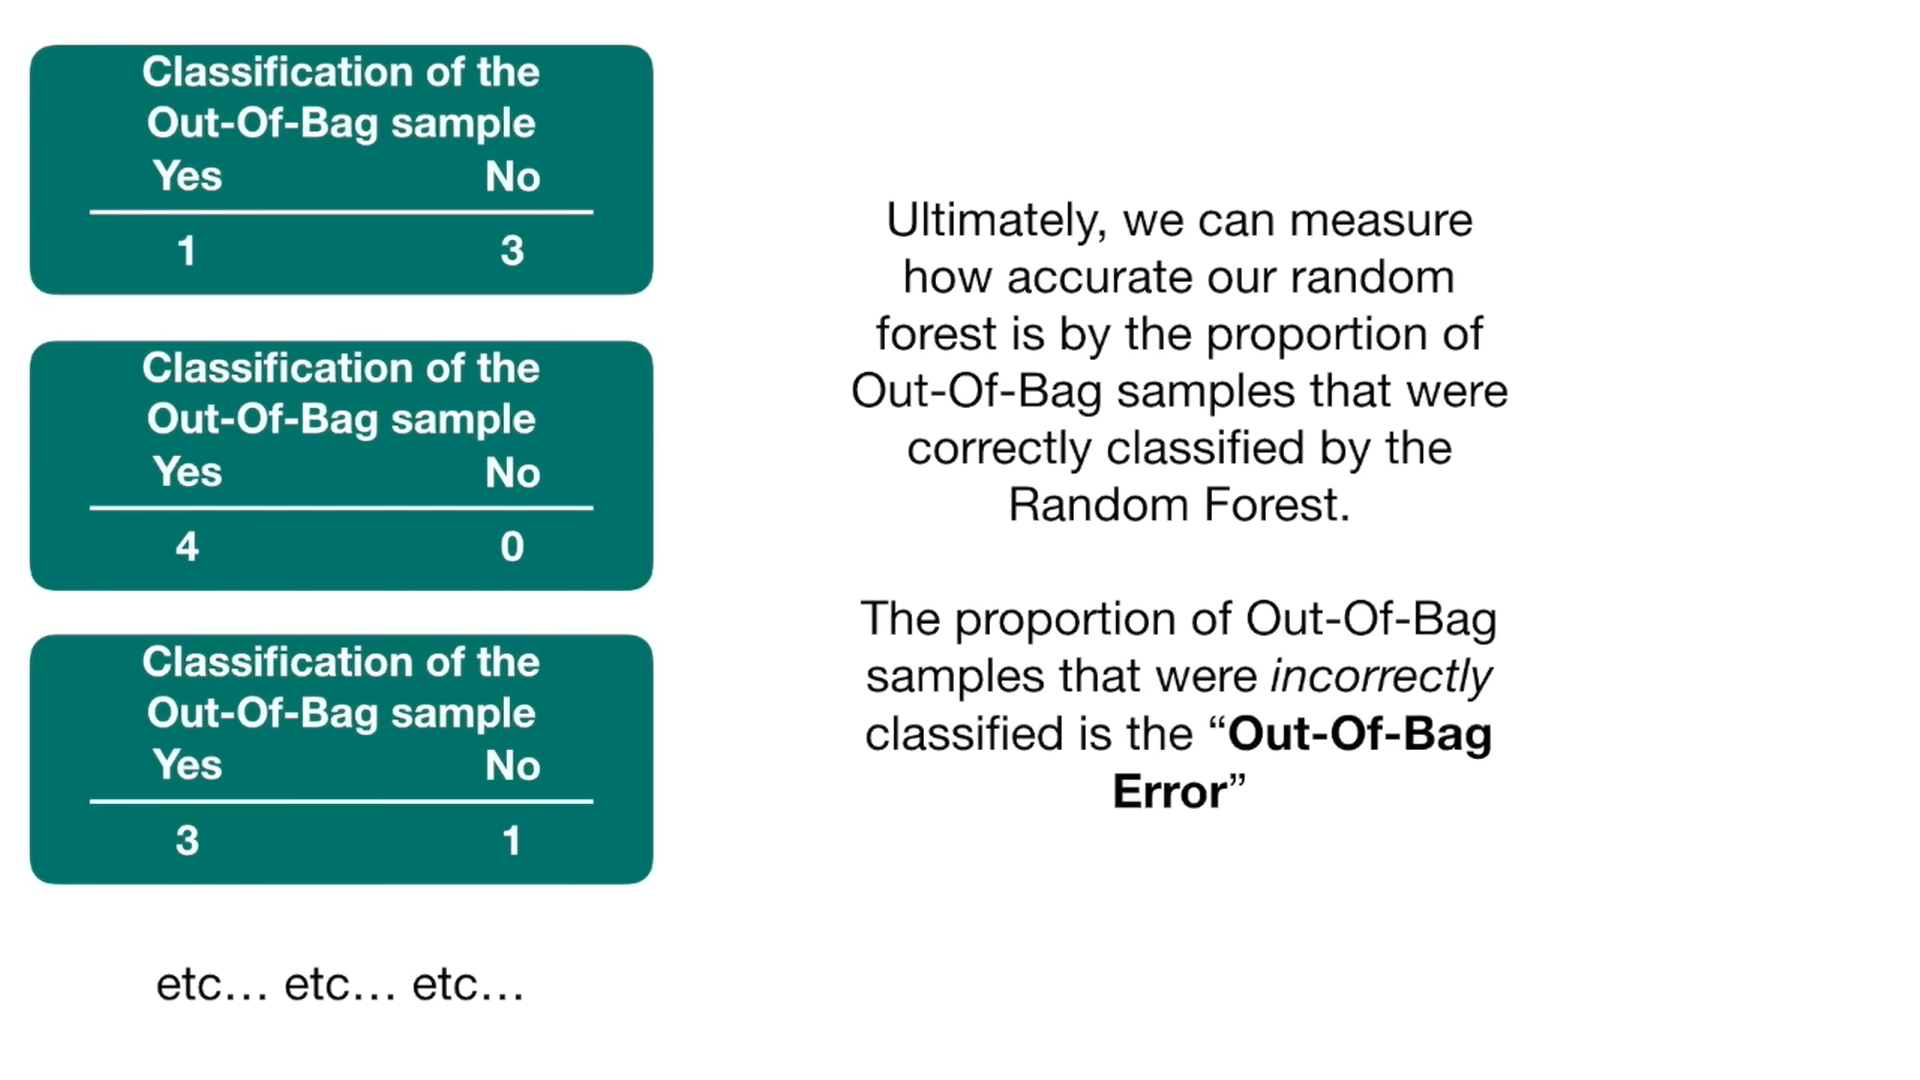

https://youtu.be/sQ870aTKqiM?si=IgBQ44WvgZn7PNUJ

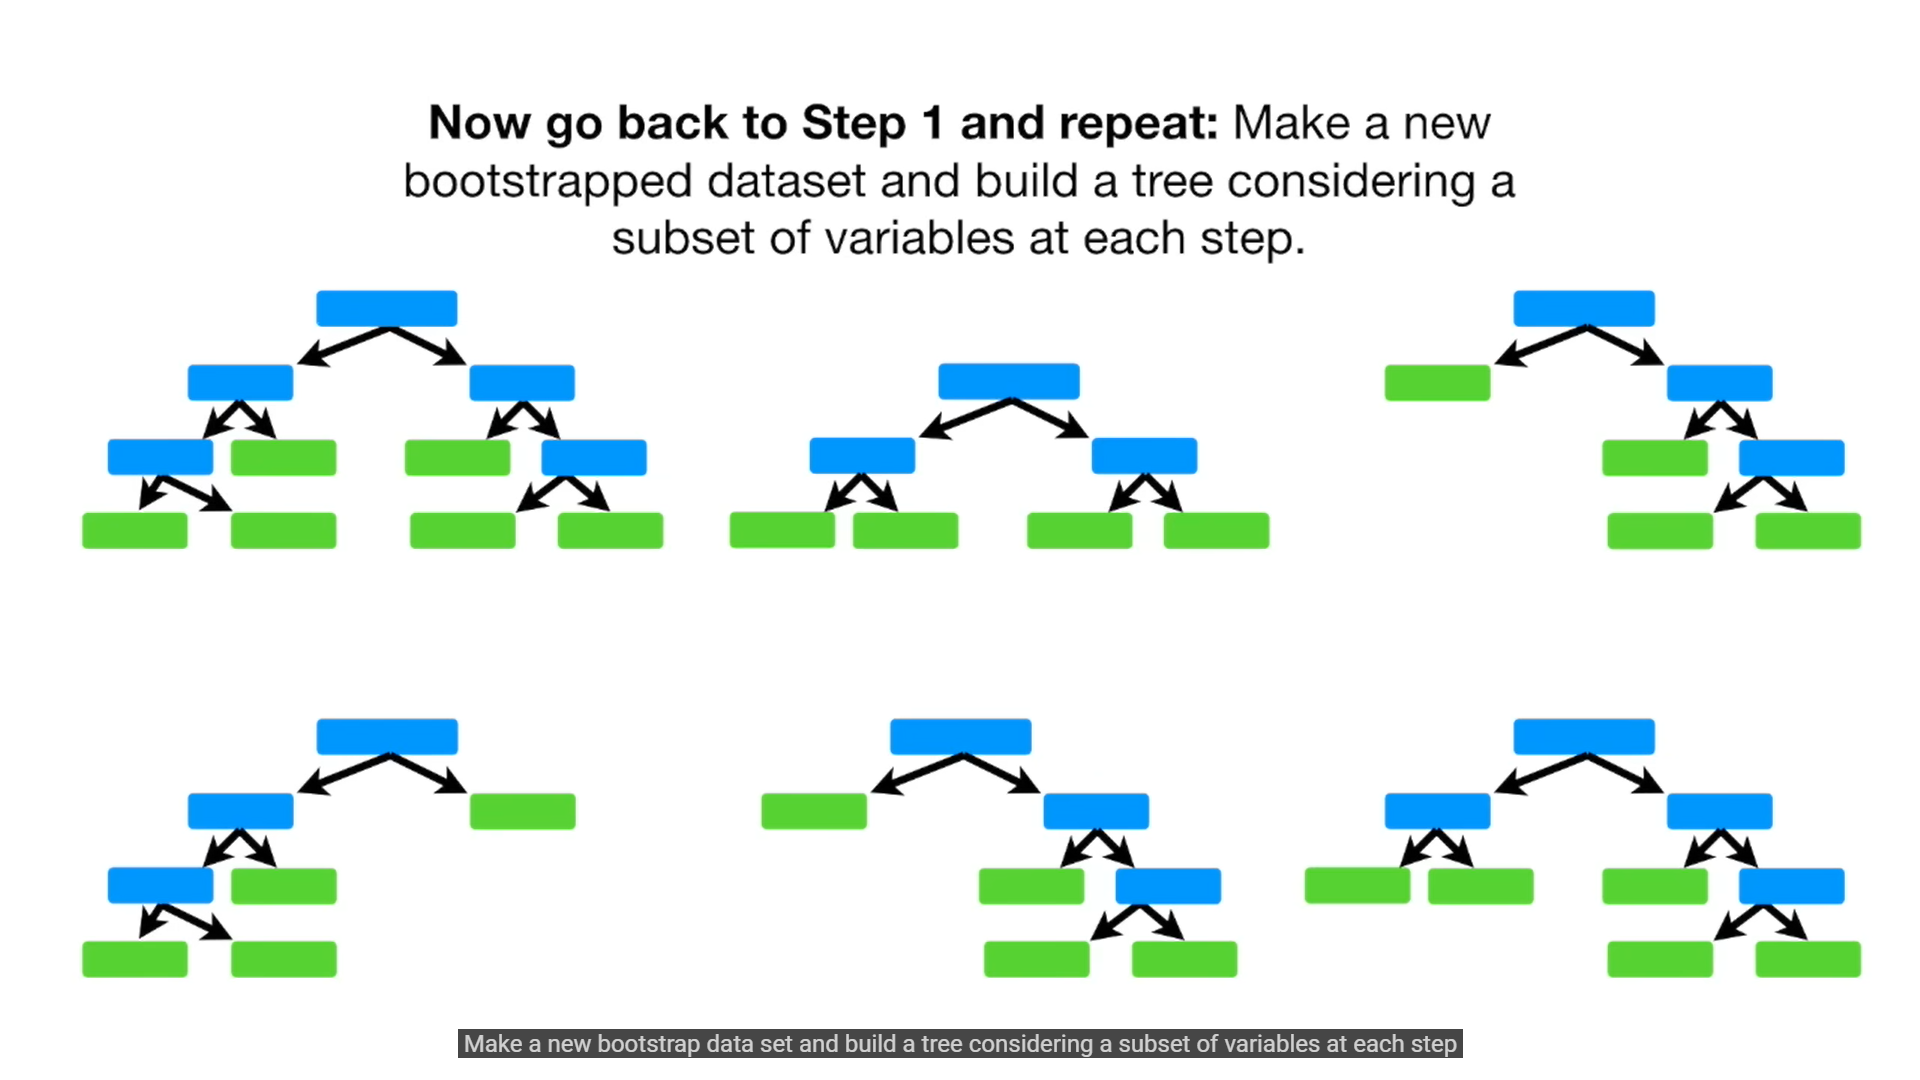

In [14]:
from sklearn.ensemble import RandomForestClassifier


In [15]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 6, random_state = 42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [16]:
y_pred_rf = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [22]:
from sklearn.metrics import roc_auc_score  

y_proba_rf = rf.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test, y_proba_rf)
    
print("AUC Score:", auc_score)

AUC Score: 0.996069439895185


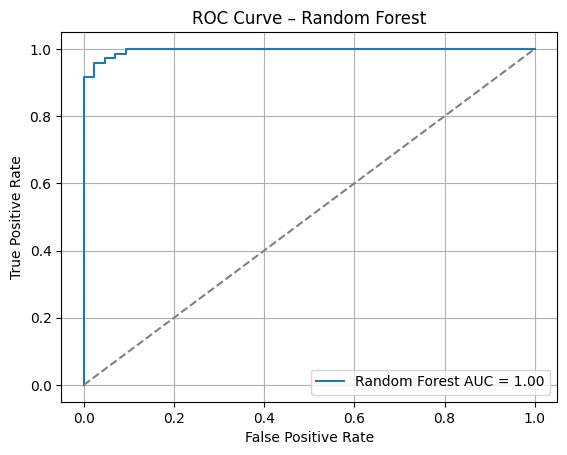

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.grid()
plt.savefig("roc_curve_rf.png", dpi=300)
plt.show()
